In [1]:
import globe
import plotly.graph_objs as go 
import h3 
import pandas as pd 
import geopandas as gpd
from shapely.ops import transform
from shapely.geometry import Point, Polygon
import random

In [2]:
def flip(x, y):
    return y, x

In [3]:
h2_set = set()
[h2_set.update(h3.h3_to_children(h, 2)) for h in list(h3.get_res0_indexes())]
h2_set = random.sample(h2_set, 1000)

h6_set = set()
[h6_set.update(h3.h3_to_children(h, 6)) for h in list(h2_set)]
h6_set = random.sample(h6_set, 10000)

In [4]:
h2_polygons = [Polygon(h3.h3_to_geo_boundary(h, geo_json=True)) for h in list(h2_set)]
h6_points = [transform(flip, Point(h3.h3_to_geo(h))) for h in list(h6_set)]

In [5]:
poly_df = gpd.GeoDataFrame(h2_polygons, columns=['geometry'], crs='epsg:4326')
point_df = gpd.GeoDataFrame(h6_points, columns=['geometry'], crs='epsg:4326')

In [6]:
point_df['hex_count'] = [random.randint(0, 10)**2 for x in range(len(point_df))]

<AxesSubplot:>

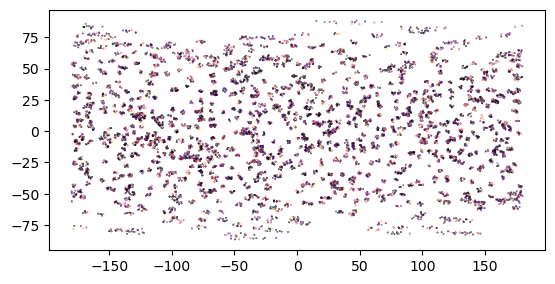

In [7]:
point_df.plot(markersize=.1, column='hex_count', cmap='magma')

In [8]:
layout = globe.base_layout(title='Random Hexes and Points', height=800, width=800)
base_sphere = globe.base_sphere()

In [9]:
poly_traces = globe.polygon_dataframe_to_sphere(poly_df)
point_traces = globe.point_dataframe_to_sphere(point_df)

In [10]:
all_traces = poly_traces + [point_traces] + [base_sphere]

In [11]:
fig = go.Figure(data=all_traces, layout=layout)

fig.show(renderer='notebook')

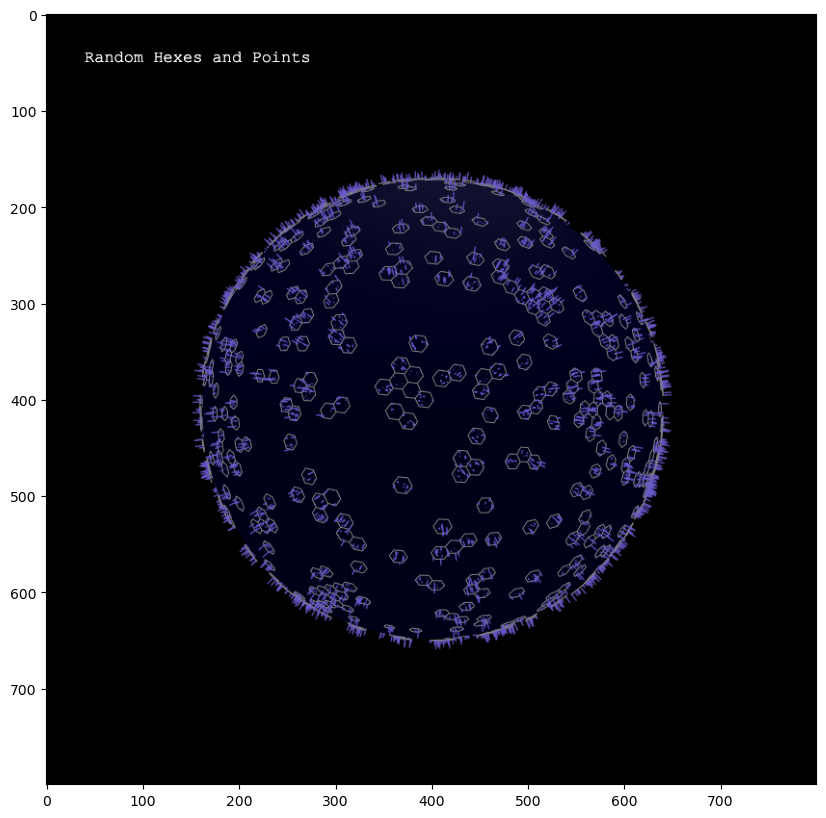

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

img = plt.imread('rand_globe.png')
plt.imshow(img)
